In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import pandas_datareader as pdr
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import kpss
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima



%matplotlib inline

In [3]:
import yfinance as yf

In [4]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-08,16847.349609,17267.916016,16788.783203,17233.474609,17233.474609,20496603770
2022-12-09,17232.148438,17280.546875,17100.835938,17133.152344,17133.152344,20328426366
2022-12-10,17134.220703,17216.826172,17120.683594,17128.724609,17128.724609,12706781969


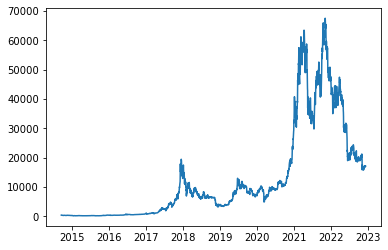

In [6]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [7]:
y = df['Adj Close']

<AxesSubplot:xlabel='Date'>

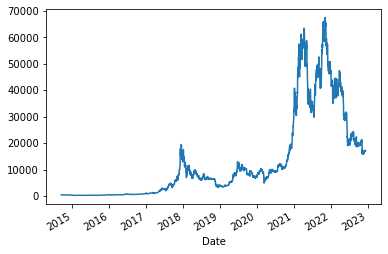

In [9]:
y.plot()

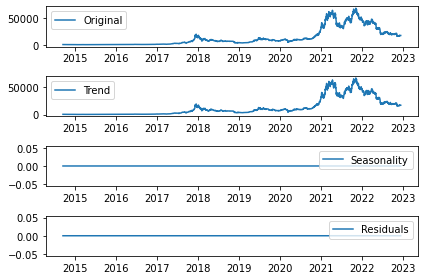

In [11]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition = seasonal_decompose(y, period=1)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [15]:
from statsmodels.tsa.stattools import kpss
kpss(y)

/Users/grant/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(5.7554309574656255,
 0.01,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [12]:
y_log = np.log(y)

<AxesSubplot:xlabel='Date'>

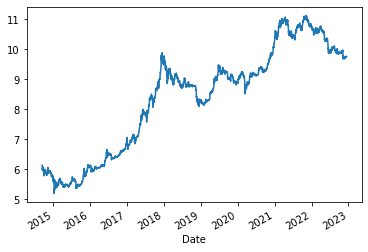

In [13]:
y_log.plot()

In [22]:
model_auto = auto_arima(df['Adj Close'])

In [23]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3009
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -24350.250
Date:                Mon, 12 Dec 2022   AIC                          48712.501
Time:                        17:29:56   BIC                          48748.555
Sample:                             0   HQIC                         48725.468
                               - 3009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9305      0.008    121.022      0.000       0.915       0.946
ar.L2         -0.9509      0.008   -125.324      0.000      -0.966      -0.936
ma.L1         -0.9607      0.013    -73.566      0.000      -0.986      -0.935
ma.L2          0.9829      0.013     76.477      0.000       0.958       1.008
ma.L3         -0.0049      0.010     -0.476      0.634      -0.025       0.015
sigma2      6.371e+05   5621.967    113.329      0.000    6.26e+05    6.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             34425.34
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):            1974.75   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
n = int(len(df)*0.9)
train = df[:n]
test = df[n:]
print(train.shape, test.shape)

(2708, 6) (301, 6)


In [25]:
model = ARIMA(train['Adj Close'], order=(2,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2708
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -21812.786
Date:                Mon, 12 Dec 2022   AIC                          43637.572
Time:                        17:34:27   BIC                          43672.993
Sample:                    09-17-2014   HQIC                         43650.379
                         - 02-14-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8429      0.003    325.120      0.000       0.838       0.848
ar.L2         -0.9820      0.003   -367.804      0.000      -0.987      -0.977
ma.L1         -0.8737      0.010    -86.848      0.000      -0.893      -0.854
ma.L2          1.0002      0.009    109.332      0.000       0.982       1.018
ma.L3         -0.0065      0.010     -0.653      0.514      -0.026       0.013
sigma2      5.948e+05   5285.270    112.533      0.000    5.84e+05    6.05e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             41470.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            5815.83   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2022-02-15    42788.497362
2022-02-16    42638.115375
2022-02-17    42313.011030
2022-02-18    42186.641784
2022-02-19    42399.364493
                  ...     
2022-12-08    42477.331714
2022-12-09    42462.100576
2022-12-10    42470.198645
2022-12-11    42491.981282
2022-12-12    42502.390438
Freq: D, Name: predicted_mean, Length: 301, dtype: float64


<AxesSubplot:xlabel='Date'>

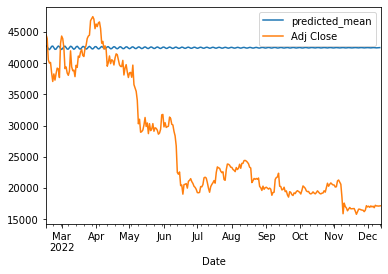

In [27]:
pred.plot(legend=True)
test['Adj Close'].plot(legend=True)

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2707
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -21813.376
Date:                Mon, 12 Dec 2022   AIC                          43638.751
Time:                        17:53:48   BIC                          43674.170
Sample:                    09-18-2014   HQIC                         43651.558
                         - 02-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9142      0.004   -436.766      0.000      -1.923      -1.906
ar.L2         -0.9825      0.005   -214.695      0.000      -0.991      -0.973
ma.L1          0.8957      0.011     82.761      0.0

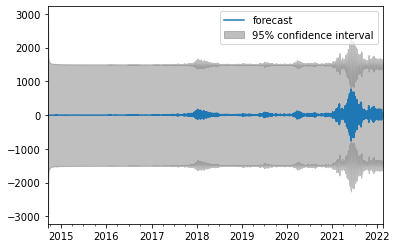

In [30]:
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(train['Adj Close'].diff().iloc[1:], order=(2,1,3))
result = model.fit()
print(result.summary())
plot_predict(result)
plt.show()